In [4]:
!pip install kaggle

In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()

In [6]:
api.authenticate()

In [7]:
!kaggle competitions list -s 'Titanic'

ref                deadline             category            reward  teamCount  userHasEntered  
-----------------  -------------------  ---------------  ---------  ---------  --------------  
spaceship-titanic  2030-01-01 00:00:00  Getting Started  Knowledge       2266           False  
titanic            2030-01-01 00:00:00  Getting Started  Knowledge      14562           False  


In [8]:
!kaggle competitions download titanic            


  0%|          | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████| 34.1k/34.1k [00:00<00:00, 4.36MB/s]


In [9]:
import zipfile
import os

In [10]:
pwd = os.getcwd()
data_dir = os.path.join(pwd,'data')

In [11]:
with zipfile.ZipFile('titanic.zip', 'r') as zipref:
    zipref.extractall(data_dir)

In [12]:
os.chdir(data_dir)

In [51]:
import pandas as pd
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [14]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [54]:
def clean(data):
    data = data.drop(["Ticket","Cabin","PassengerId"], axis = 1)
    data.Age.fillna(data.Age.mean(), inplace = True)
    data.Embarked.fillna("U",inplace = True)
    return data

In [55]:
data = clean(data)
test = clean(test)

In [56]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [42]:
data["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [61]:
def onehotencoder(data):
    dummies_1 = pd.get_dummies(data.Sex)
    dummies_2 = pd.get_dummies(data.Embarked)
    merged = pd.concat([data,dummies_1, dummies_2], axis=1)
    final = merged.drop(["Sex","Embarked"],axis=1)
    return final

In [62]:
data = onehotencoder(data)

In [63]:
data

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,female,male,C,Q,S,U
0,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,7.2500,0,1,0,0,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,71.2833,1,0,1,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,7.9250,1,0,0,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,53.1000,1,0,0,0,1,0
4,0,3,"Allen, Mr. William Henry",35.000000,0,0,8.0500,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.000000,0,0,13.0000,0,1,0,0,1,0
887,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,30.0000,1,0,0,0,1,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,23.4500,1,0,0,0,1,0
889,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,30.0000,0,1,1,0,0,0


In [64]:
test = onehotencoder(test)
test

,Pclass,Name,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,"Kelly, Mr. James",34.50000,0,0,7.8292,0,1,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,7.0000,1,0,0,0,1
2,2,"Myles, Mr. Thomas Francis",62.00000,0,0,9.6875,0,1,0,1,0
3,3,"Wirz, Mr. Albert",27.00000,0,0,8.6625,0,1,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",30.27259,0,0,8.0500,0,1,0,0,1
414,1,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,108.9000,1,0,1,0,0
415,3,"Saether, Mr. Simon Sivertsen",38.50000,0,0,7.2500,0,1,0,0,1
416,3,"Ware, Mr. Frederick",30.27259,0,0,8.0500,0,1,0,0,1


In [68]:
X = data.drop(['Survived','Name'],axis=1)
y = data['Survived']


In [72]:
test_X = test.drop(['Name'],axis=1)

In [70]:
scaler = preprocessing.MinMaxScaler() 

In [73]:
scaled_X = scaler.fit_transform(X)

In [78]:
scaled_test_X=scaler.fit_transform(test_X)

In [79]:
scaled_test_X

array([[1.        , 0.4527232 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.61756561, 0.125     , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 0.8153765 , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.50547277, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.39697468, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.39697468, 0.125     , ..., 1.        , 0.        ,
        0.        ]])

In [81]:
scaled_X

array([[1.        , 0.27117366, 0.125     , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.4722292 , 0.125     , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.32143755, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.36792055, 0.125     , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.32143755, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.39683338, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

In [89]:
import numpy as np
X_train.shape

(712, 11)

In [96]:
addon = np.zeros((scaled_test_X.shape[0],1))
addon.shape

(418, 1)

In [99]:
scaled_test_X = np.append(scaled_test_X,addon,axis=1)

In [100]:
scaled_test_X.shape

(418, 11)

In [101]:
import tensorflow as tf


In [107]:
model = tf.keras.models.Sequential()

In [108]:
model.add(tf.keras.layers.Dense(units=128,
                                input_dim=11,
                                use_bias=True,
                                kernel_initializer='uniform',
                                bias_initializer='zeros',
                                activation='relu'))

In [109]:
model.add(tf.keras.layers.Dense(units=64, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1536      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='binary_crossentropy', metrics = 'accuracy')

In [111]:
train_history = model.fit(x=X_train, y=y_train,validation_split=0.2,epochs=100,batch_size=20,verbose=2)

Epoch 1/100
29/29 - 0s - loss: 0.8217 - accuracy: 0.3831 - val_loss: 0.8210 - val_accuracy: 0.3497 - 452ms/epoch - 16ms/step
Epoch 2/100
29/29 - 0s - loss: 0.7848 - accuracy: 0.3831 - val_loss: 0.7805 - val_accuracy: 0.3497 - 77ms/epoch - 3ms/step
Epoch 3/100
29/29 - 0s - loss: 0.7508 - accuracy: 0.3831 - val_loss: 0.7441 - val_accuracy: 0.3497 - 89ms/epoch - 3ms/step
Epoch 4/100
29/29 - 0s - loss: 0.7191 - accuracy: 0.3831 - val_loss: 0.7086 - val_accuracy: 0.3497 - 78ms/epoch - 3ms/step
Epoch 5/100
29/29 - 0s - loss: 0.6896 - accuracy: 0.3902 - val_loss: 0.6757 - val_accuracy: 0.6643 - 93ms/epoch - 3ms/step
Epoch 6/100
29/29 - 0s - loss: 0.6647 - accuracy: 0.7540 - val_loss: 0.6458 - val_accuracy: 0.8252 - 88ms/epoch - 3ms/step
Epoch 7/100
29/29 - 0s - loss: 0.6420 - accuracy: 0.7944 - val_loss: 0.6218 - val_accuracy: 0.8392 - 80ms/epoch - 3ms/step
Epoch 8/100
29/29 - 0s - loss: 0.6236 - accuracy: 0.7873 - val_loss: 0.6006 - val_accuracy: 0.8042 - 84ms/epoch - 3ms/step
Epoch 9/100
29

In [112]:
train_history.history

{'loss': [0.8217443823814392,
  0.7847656607627869,
  0.7508098483085632,
  0.7191058993339539,
  0.6895753145217896,
  0.6647151708602905,
  0.6419637203216553,
  0.6236417889595032,
  0.6079532504081726,
  0.5939596891403198,
  0.5818220376968384,
  0.5709081888198853,
  0.5604550242424011,
  0.5506686568260193,
  0.5420050024986267,
  0.5335642099380493,
  0.5263776183128357,
  0.5200735330581665,
  0.5141651034355164,
  0.5092350244522095,
  0.5047630071640015,
  0.5010892152786255,
  0.4979346692562103,
  0.4949570894241333,
  0.49253129959106445,
  0.49071231484413147,
  0.48874181509017944,
  0.48674261569976807,
  0.48502326011657715,
  0.48354071378707886,
  0.4824940264225006,
  0.48149755597114563,
  0.4801066815853119,
  0.4790300130844116,
  0.4783625602722168,
  0.4773039221763611,
  0.47654351592063904,
  0.47533711791038513,
  0.47444701194763184,
  0.4740959405899048,
  0.4733544588088989,
  0.47268906235694885,
  0.4719451665878296,
  0.4714043438434601,
  0.470473945

In [113]:
train_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [114]:
submission_preds=model.predict(scaled_test_X)

14/14 [==============================] - 2s 538us/step


In [116]:
import matplotlib.pyplot as plt


In [117]:
def plot_train_history(train_history, train_metric, validation_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[validation_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('epochs')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

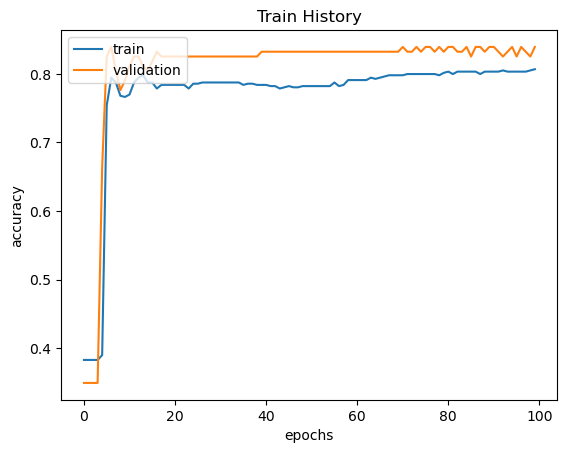

In [121]:
plot_train_history(train_history, 'accuracy', 'val_accuracy')

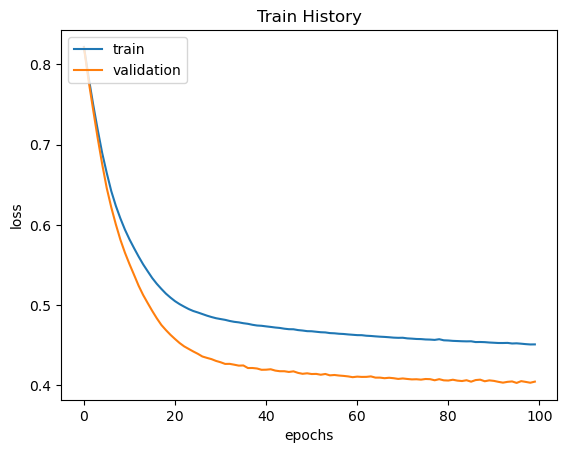

In [122]:
plot_train_history(train_history, 'loss', 'val_loss')

In [123]:
evaluate_results=model.evaluate(x=X_val, y = y_val)

6/6 [==============================] - 0s 1ms/step - loss: 0.4368 - accuracy: 0.7933


In [130]:
submission_preds[submission_preds>=0.5]=1

In [131]:
submission_preds[submission_preds<0.5]=0

In [136]:
submission_preds.shape

(418, 1)

In [133]:
test_read = pd.read_csv("test.csv")
test_ids= test_read["PassengerId"]

In [138]:
test_ids.values.shape

(418,)

In [139]:
df = pd.DataFrame({"PassengerId":test_ids.values,"Survived":submission_preds.reshape(-1,)})

In [144]:
df["Survived"] = df.Survived.astype(int)

In [145]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [146]:
df.to_csv("submission.csv", index= False)